In [18]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

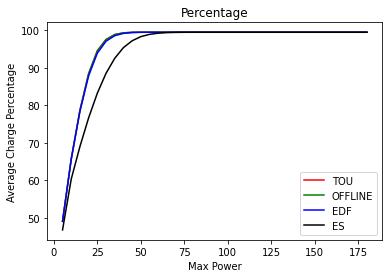

In [19]:
# Typical Charger draws around 7.5 KW
sample_step = 5
max_power = int(180)
num_of_samples = int(180 / sample_step)

num_vehicle_ub = 100000
num_vehicle_lb = 0

tou_df = np.zeros(num_of_samples,dtype=object)
edf_df = np.zeros(num_of_samples,dtype=object)
es_df = np.zeros(num_of_samples,dtype=object)
offline_df = np.zeros(num_of_samples,dtype=object)
tou_percent_mean = np.zeros(num_of_samples,dtype=object)
offline_percent_mean = np.zeros(num_of_samples,dtype=object)
edf_percent_mean = np.zeros(num_of_samples,dtype=object)
es_percent_mean = np.zeros(num_of_samples,dtype=object)
tou_emission_mean = np.zeros(num_of_samples,dtype=object)
edf_emission_mean = np.zeros(num_of_samples,dtype=object)
es_emission_mean = np.zeros(num_of_samples,dtype=object)
offline_emission_mean = np.zeros(num_of_samples,dtype=object)

power = np.arange(sample_step, max_power+1, sample_step, dtype=int)

for i in range(1,num_of_samples+1,1):
    tou_df[i-1] = pd.read_csv('gurobisolver/TOU_P{}.0.csv'.format(i*sample_step))
    edf_df[i-1] = pd.read_csv('EDF_P{}.csv'.format(i*sample_step))
    es_df[i-1] = pd.read_csv('ES_P{}.csv'.format(i*sample_step))
    offline_df[i-1] = pd.read_csv('gurobisolver/offline_P{}.csv'.format(i*sample_step))
    df = tou_df[i-1]
    df2 = offline_df[i-1]
    df3 = edf_df[i-1]
    df4 = es_df[i-1]

    tou_percent_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                               (df.num_vehicle > num_vehicle_lb)].percents.mean()
    tou_emission_mean[i-1] = df[(df.num_vehicle < num_vehicle_ub) & 
                                (df.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    offline_percent_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                               (df2.num_vehicle > num_vehicle_lb)].percents.mean()
    offline_emission_mean[i-1] = df2[(df2.num_vehicle < num_vehicle_ub) & 
                                (df2.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    edf_percent_mean[i-1] = df3[(df3.num_vehicle < num_vehicle_ub) & 
                               (df3.num_vehicle > num_vehicle_lb)].percents.mean()
    edf_emission_mean[i-1] = df3[(df3.num_vehicle < num_vehicle_ub) & 
                                (df3.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
    
    es_percent_mean[i-1] = df4[(df4.num_vehicle < num_vehicle_ub) & 
                               (df4.num_vehicle > num_vehicle_lb)].percents.mean()
    es_emission_mean[i-1] = df4[(df4.num_vehicle < num_vehicle_ub) & 
                                (df4.num_vehicle > num_vehicle_lb)]['carbon_emission(kg)'].mean()
#print(df)
#print(df2)
    
plt.plot(power,tou_percent_mean, color='r', label='TOU')
plt.plot(power,offline_percent_mean, color='g', label='OFFLINE')
plt.plot(power,edf_percent_mean, color='b', label='EDF')
plt.plot(power,es_percent_mean, color='k', label='ES')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Max Power")
plt.ylabel("Average Charge Percentage")
plt.title("Percentage")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

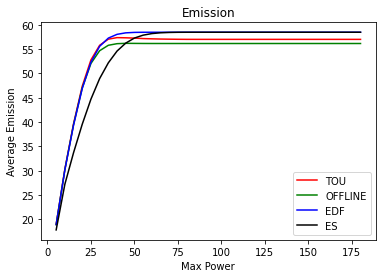

In [6]:
plt.plot(power,tou_emission_mean, color='r', label='TOU')
plt.plot(power,offline_emission_mean, color='g', label='OFFLINE')
plt.plot(power,edf_emission_mean, color='b', label='EDF')
plt.plot(power,es_emission_mean, color='k', label='ES')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Max Power")
plt.ylabel("Average Emission")
plt.title("Emission")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

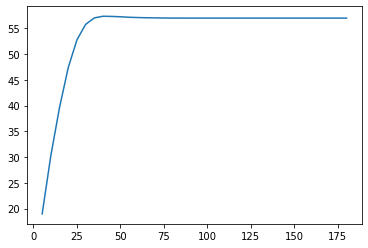

In [7]:
plt.plot(power,tou_emission_mean)

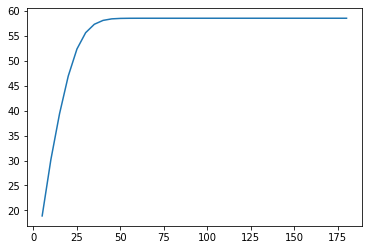

In [8]:
plt.plot(power,edf_emission_mean)

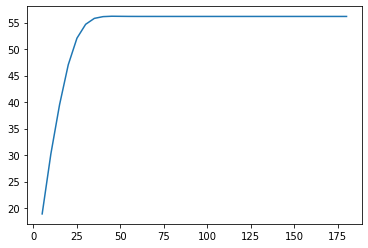

In [9]:
plt.plot(power,offline_emission_mean)

In [10]:
print(offline_percent_mean)

[49.11392857142858 65.72657738095242 78.6770238095238 88.40833333333327
 94.49068452380955 97.49288690476192 98.81943452380953 99.26824404761899
 99.40654761904754 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375]


In [11]:
print(tou_percent_mean)

[49.11392857142858 65.72660714285718 78.67699404761905 88.4083928571428
 94.49077380952383 97.49288690476192 98.8194642857143 99.26824404761899
 99.40657738095231 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375
 99.43389880952375 99.43389880952375 99.43389880952375 99.43389880952375]


In [12]:
print(edf_percent_mean)

[49.10943452380951 65.59622023809526 78.38071428571429 87.82300595238097
 93.86520833333341 97.04184523809526 98.51434523809527 99.12791666666665
 99.35559523809525 99.41726190476187 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524
 99.42934523809524 99.42934523809524 99.42934523809524 99.42934523809524]


In [13]:
header = ['max power']+power.tolist()
tou_emission_data = ['TOU Emission'] + tou_emission_mean.tolist()
edf_emission_data = ['EDF Emission'] + edf_emission_mean.tolist()
es_emission_data = ['ES Emission'] + es_emission_mean.tolist()
offline_emission_data = ['Offline Emission'] + offline_emission_mean.tolist()

tou_percent_data = ['TOU Percentage'] + tou_percent_mean.tolist()
edf_percent_data = ['EDF Percentage'] + edf_percent_mean.tolist()
es_percent_data = ['ES Percentage'] + es_percent_mean.tolist()
offline_percent_data = ['Offline Percentage'] + offline_percent_mean.tolist()

print(header)
print(tou_percent_data)

['max power', 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180]
['TOU Percentage', 49.11392857142858, 65.72660714285718, 78.67699404761905, 88.4083928571428, 94.49077380952383, 97.49288690476192, 98.8194642857143, 99.26824404761899, 99.40657738095231, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375, 99.43389880952375]


In [14]:
with open('emission.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    writer.writerow(offline_emission_data)
    writer.writerow(tou_emission_data)
    writer.writerow(edf_emission_data)
    writer.writerow(es_emission_data)

In [15]:
with open('percent.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    
    writer.writerow(offline_percent_data)
    writer.writerow(tou_percent_data)
    writer.writerow(edf_percent_data)
    writer.writerow(es_percent_data)